Before Starting with CNN first we will look on the convolutional operation.

## What is Convolution Operation?

It is multiplication of a (n x n) matrix  with a filter of (k x k) size.

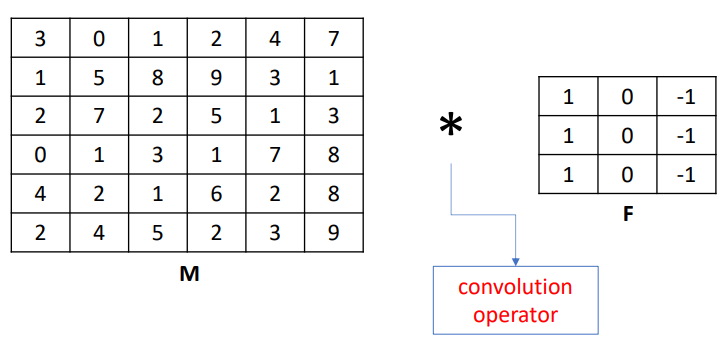


Assume a 6x6 matrix M as input. The 2D convolution of M with filter (or kernel)
F and stride 1 is a 4x4 matrix CM (sometimes called feature map) computed as follows:

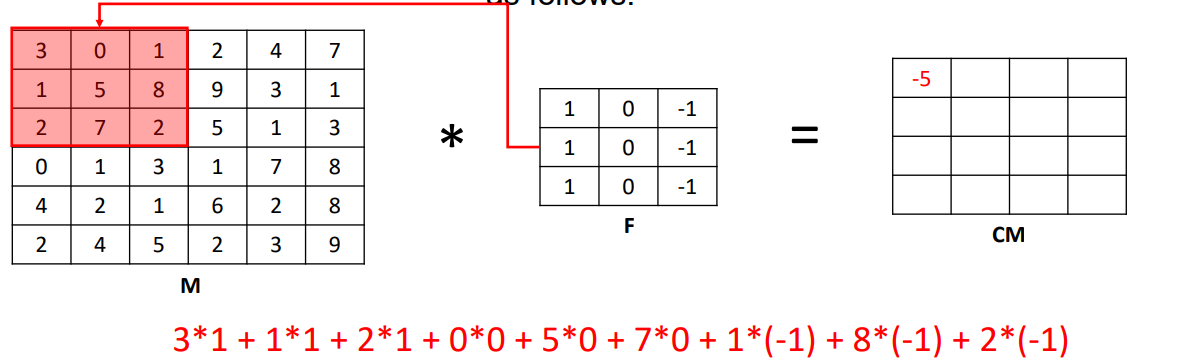



### Now Lets See what is a Convolutional Neural Network?

In very simple words we pass a image or a tensor with some height, width and number of channels to the convolution layer where it convolve by a kernel (tensor) and output anther tensor or matrix which is know as feature map which we will use for our image classification task.

## Architecture:

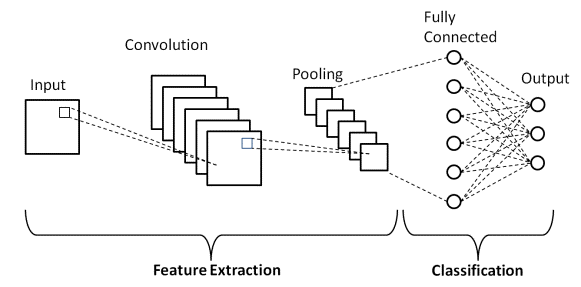

### Layers in CNN:

1) Convolutional Layer: 
   Where input image is convolved by a kernel which give us  the feature map.

2) Pooling Layer:
   Where we reduces the size of feature map by applying some mathematical operation.

3) Fully Connected Layer:
   Here we make a fully connected neural network for our problem in this situation classifying images.
  

## Pooling Layer:
   Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.

   1) max Pooling
   2) Avg Pooling
   3) Sum Pooling

1.   Max Pooling
2.   Average Pooling
3.   Sum Pooling


# Implemetation:

Here we implement a binary classification problem using CNN.

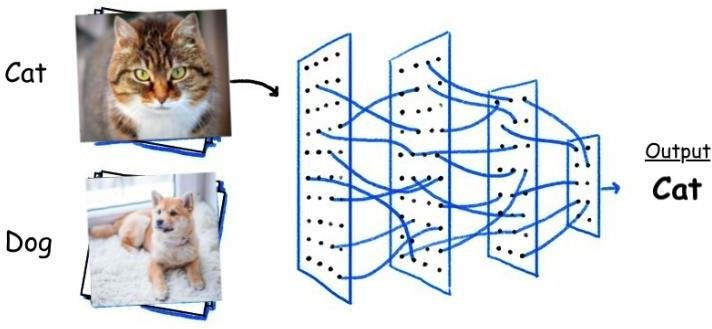

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Prepare Dataset

In [5]:
# import dataset from this link
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training dat
testing_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [28]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=2000,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(180,180), #(180,180) image size
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [29]:
test_data_gen = testing_image_generator.flow_from_directory(batch_size=1000,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(180,180), #(180,180)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [30]:
training_images, training_labels = next(train_data_gen) 

In [31]:
testing_images, testing_labels = next(test_data_gen)

In [32]:
training_images.shape

(2000, 180, 180, 3)

In [33]:
testing_images.shape

(1000, 180, 180, 3)

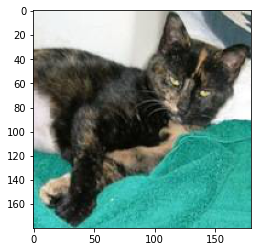

In [15]:
# Plot a sample image and check its label

plt.imshow(training_images[30])
plt.show()

In [16]:
training_labels[30]

0.0

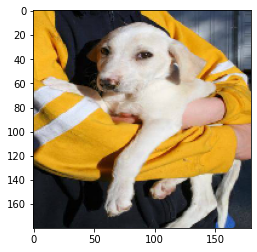

In [17]:
plt.imshow(training_images[77])
plt.show()

In [18]:
training_labels[77]

1.0



> Label Cat: 0

> Label Dog: 1





## Model Building

In [34]:
# filters: how many feature maps you want to learn
# kernel_size: kernel matrix shape
# activation: activation function could be relu,sigmoid etc


model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(180,180,3)), 
        MaxPool2D(),
        Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
        Conv2D(filters=128, kernel_size=(3,3),activation='relu'),

        # It Flattens the output feature map and convert it into 1D vector 
        Flatten(),
        Dense(100,activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')

        

])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 924800)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               92480100  
                                                        

In [36]:
hist = model.fit(training_images, training_labels, epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10
63/63 [==============================] - 8s 104ms/step - loss: 0.8351 - accuracy: 0.5510 - val_loss: 0.6655 - val_accuracy: 0.5760
Epoch 2/10
63/63 [==============================] - 6s 97ms/step - loss: 0.6619 - accuracy: 0.5860 - val_loss: 0.6702 - val_accuracy: 0.5870
Epoch 3/10
63/63 [==============================] - 6s 89ms/step - loss: 0.6481 - accuracy: 0.6000 - val_loss: 0.6430 - val_accuracy: 0.6330
Epoch 4/10
63/63 [==============================] - 6s 89ms/step - loss: 0.6377 - accuracy: 0.6310 - val_loss: 0.6780 - val_accuracy: 0.6050
Epoch 5/10
63/63 [==============================] - 6s 89ms/step - loss: 0.5221 - accuracy: 0.7465 - val_loss: 0.7013 - val_accuracy: 0.6060
Epoch 6/10
63/63 [==============================] - 6s 89ms/step - loss: 0.3080 - accuracy: 0.8730 - val_loss: 1.0019 - val_accuracy: 0.6220
Epoch 7/10
63/63 [==============================] - 6s 89ms/step - loss: 0.1087 - accuracy: 0.9615 - val_loss: 1.9938 - val_accuracy: 0.5910
Epoch 8/10
6

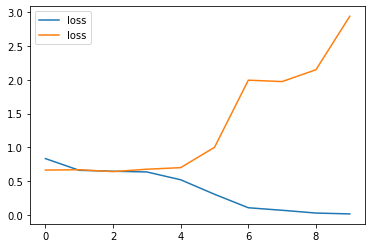

In [37]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'], label='loss')

plt.legend()
plt.show()


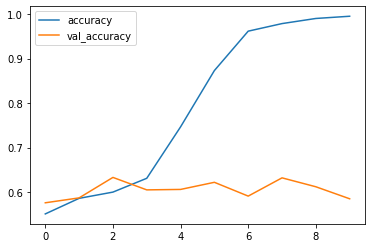

In [38]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

We can observe from the above graph that model is overfitting on training but didn't succeed to generalize the test set.

Let;s try to some more layers in our model 

In [39]:
# Normaliztion : it normalizes the matrix features

model_2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(180,180,3)), 
        MaxPool2D(),
        tf.keras.layers.Normalization(), # Add Normalization 
        
        Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        tf.keras.layers.Normalization(),

        Conv2D(filters=128, kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        tf.keras.layers.Normalization(),

        # It Flattens the output feature map and convert it into 1D vector 
        Flatten(),
        Dense(50, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')

        

])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='sgd', metrics=['accuracy'])

In [40]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 normalization (Normalizatio  (None, 89, 89, 32)       65        
 n)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                      

In [41]:
hist_2 = model_2.fit(training_images, training_labels, epochs=30, validation_data=(testing_images,testing_labels))

Epoch 1/30
63/63 [==============================] - 5s 61ms/step - loss: 0.6939 - accuracy: 0.4990 - val_loss: 0.6918 - val_accuracy: 0.5430
Epoch 2/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6907 - accuracy: 0.5290 - val_loss: 0.6893 - val_accuracy: 0.5240
Epoch 3/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6903 - accuracy: 0.5220 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 4/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6914 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 5/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6872 - accuracy: 0.5460 - val_loss: 0.6875 - val_accuracy: 0.5140
Epoch 6/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6816 - accuracy: 0.5655 - val_loss: 0.6864 - val_accuracy: 0.5510
Epoch 7/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6792 - accuracy: 0.5810 - val_loss: 0.6753 - val_accuracy: 0.5730
Epoch 8/30
63

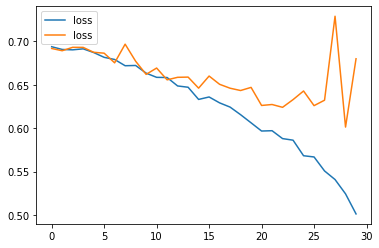

In [42]:
plt.plot(hist_2.history['loss'],label='loss')
plt.plot(hist_2.history['val_loss'], label='loss')

plt.legend()
plt.show()


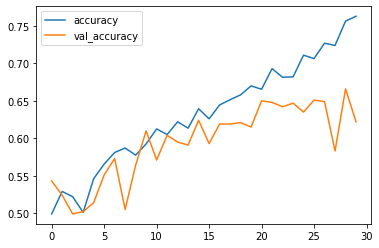

In [43]:
plt.plot(hist_2.history['accuracy'],label='accuracy')
plt.plot(hist_2.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

# Transfer Learning:

It is simply the reuse of Pretrained Models which is trained on particular task.

### Now we use VGG-16 architecture of CNN to build our model 

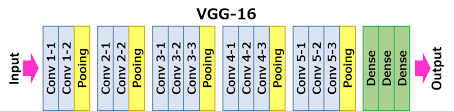




In [11]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [12]:
model_vgg = VGG16()

model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Another imporatnat to notice is that on prediction layers it gives 1000 outputs ut we only need 2 output so what we do here is just remove the Fully connected layers from VGG-16 part and use its CNN part as our Feature extractor for images. 




How to do it? Ahhh it's very simple man :) 

In [23]:
# when define the VGG model pass include_top = False as parameter it will automatically cut the Dense layers and 
# only include the Layers till Pooling

model_vgg = VGG16(include_top=False, input_shape=(224,224,3))

# Flattening the last layer output
flatten_layer = Flatten()(model_vgg.layers[-1].output)

# add new Dense Layer
dense1 = Dense(128, activation='relu')(flatten_layer)
dense2 = Dense(64, activation='relu')(dense1)
output =  Dense(1, activation='sigmoid')(dense2)

model_vgg = Model(inputs=model_vgg.input,outputs=output)
model_vgg.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

We can see above that input shape for this model should be (224,224,3). Ok so here we will change the shape of images.




In [15]:
train_data_gen_224 = train_image_generator.flow_from_directory(batch_size=2000,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(224,224), # image size
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
test_data_gen_224 = testing_image_generator.flow_from_directory(batch_size=1000,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(224,224), #(180,180)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
train_data, train_labels = next(train_data_gen_224)

In [18]:
test_data, test_labels = next(test_data_gen_224)

## Train Model

In [25]:
hist = model_vgg.fit(train_data,train_labels,batch_size=64,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
32/32 [==============================] - 64s 1s/step - loss: 0.6179 - accuracy: 0.6560 - val_loss: 0.6208 - val_accuracy: 0.6050
Epoch 2/10
32/32 [==============================] - 34s 1s/step - loss: 0.4435 - accuracy: 0.8020 - val_loss: 0.4845 - val_accuracy: 0.7390
Epoch 3/10
32/32 [==============================] - 34s 1s/step - loss: 0.3334 - accuracy: 0.8580 - val_loss: 0.2569 - val_accuracy: 0.9140
Epoch 4/10
32/32 [==============================] - 34s 1s/step - loss: 0.2242 - accuracy: 0.9160 - val_loss: 0.2442 - val_accuracy: 0.9040
Epoch 5/10
32/32 [==============================] - 34s 1s/step - loss: 0.1874 - accuracy: 0.9245 - val_loss: 0.3120 - val_accuracy: 0.8540
Epoch 6/10
32/32 [==============================] - 34s 1s/step - loss: 0.1342 - accuracy: 0.9520 - val_loss: 0.1494 - val_accuracy: 0.9380
Epoch 7/10
32/32 [==============================] - 34s 1s/step - loss: 0.1130 - accuracy: 0.9600 - val_loss: 0.1397 - val_accuracy: 0.9420
Epoch 8/10
32/32 [==

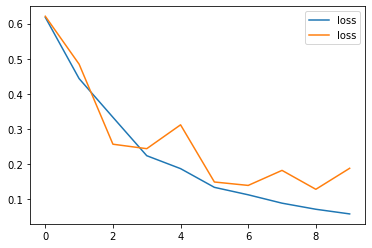

In [26]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'], label='loss')

plt.legend()
plt.show()

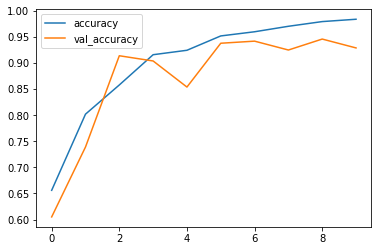

In [27]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

Now this is something nice :)

The thing which you have jot down is that when your models sucks try different flavours, Tune parameters or you could use Transfer Learning.

The End......

Resource: https://cs231n.github.io/convolutional-networks/